### Part 1: Problem Statement -  To predict the profit of a food truck

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the file in a dataframe
ds = pd.read_csv("ex1data1.txt", header = None)

In [3]:
#Getting an idea of our dataset
m = len(ds)
print(ds.head())
ds.describe()

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
#Dividing dataset into input and output variables
X = ds.iloc[:, 0:1].values
y = ds.iloc[:, 1:].values

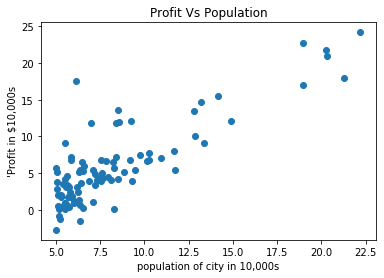

In [5]:
# Plotting the variables to see the relationship betwen them.
plt.scatter(X, y)
plt.xlabel("population of city in 10,000s")
plt.ylabel("'Profit in $10,000s")
plt.title("Profit Vs Population")
plt.show()

In [7]:
# Adding intercept to the input matrix X
X = np.hstack((np.ones((m,1)),X))

In [11]:
theta

array([[0.],
       [0.]])

In [10]:
# initializing theta = 0 and learning rate, alpha with 0.01
#Since we have 2 vaiables in input, theta will be of 2X1 dimension
theta = np.zeros([2,1])
alpha = 0.01
iterations = 1500

In [12]:
def computeCost(X, y, theta):
    predict = np.dot(X,theta)
    cost = np.sum((predict - y)**2)/(2*m)
    return cost

In [13]:
J = computeCost(X, y, theta)
print(J)

32.072733877455676


In [14]:
# Using gradient descent to reduce J by fiding optimal parameters of theta
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X,theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m)* temp
    return theta

In [17]:
# Optimized value of theta:
theta = gradientDescent(X, y, theta, alpha, iterations)

In [20]:
#Checking new cost function with optimized theta
J = computeCost(X, y, theta)
print(J)

4.483388256587726


##### Cost function has Reduced from 32.07 to 4.48. 

### Predicting profit for population of 35000 and 70000

In [21]:
predict1 = np.dot(np.array([1,3.5]), theta)
predict2 = np.dot(np.array([1, 7]), theta)

In [22]:
print(predict1*10000)
print(predict2*10000)

[4519.7678677]
[45342.45012945]


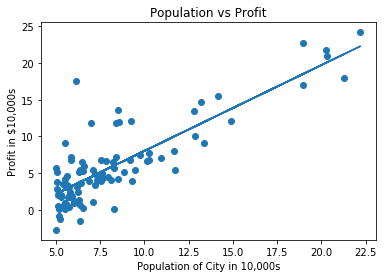

In [26]:
# plotting with best fit line

plt.scatter(X[:,1],y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title("Population vs Profit")
plt.plot(X[:,1] , np.dot(X, theta))
plt.show()

### Part 2: ProblemStatement - Predicting market price of houses. (Using LR with multiple variables)

In [31]:
ds1 = pd.read_csv("ex1data2.txt", header = None)

In [32]:
m1 = len(ds1)
print(ds1.head())
ds1.describe()

      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900


,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [71]:
#Dividing dataset into input and output variables
X1 = ds1.iloc[:, 0:2].values
y1 = ds1.iloc[:, 2:].values

In [72]:
#Feature scaling input X1
X1 = (X1 - np.mean(X1))/np.std(X1)

In [73]:
#Adding the intercept
X1 = np.hstack((np.ones((m1,1)), X1))

In [74]:
#Initializing theta and alpha
alpha = 0.01
theta = np.zeros((3, 1))
iterations = 400

In [75]:
#First lets compute the cost function
def computeCostMulti(X1, y1, theta):
    predict = np.dot(X1, theta)
    return np.sum((predict-y1)**2)/ (2*m)

In [77]:
J = computeCostMulti(X1, y1, theta)
print(J)

31781471762.92268


In [80]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X1, theta)-y1 
        temp = np.dot(X1.T, temp)
        return theta - (alpha/m1) * temp

In [81]:
theta = gradientDescentMulti(X1, y1, theta, alpha, iterations)

In [82]:
print(theta)

[[3404.12659574]
 [ 782.23765953]
 [ 705.26469631]]


In [83]:
#New cost function with optimized theta
J = computeCost(X1, y1, theta)
print(J)

31169434131.44432


In [84]:
#Predicting price of house with size 1650 and 3 rooms:
x =np.array([1650,3])

In [89]:
x = (x - np.mean(X1))/np.std(X1)
x = np.append(np.ones(1), x)

In [90]:
x

array([1.00000000e+00, 1.85552145e+03, 2.64644661e+00])

In [91]:
predict = np.dot(x, theta)

In [93]:
print(predict)

[1456729.32556732]
